## Scraping data from the web (Skytrax) and Analysing the data to obtain insights and offer recommendation
Python and BeautifulSoup are used to collect all the links to the reviews ([https://www.airlinequality.com/airline-reviews/british-airways]) and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [10]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | As always when I fly BA it ...
1,✅ Trip Verified | First time using BA busines...
2,Not Verified | Extremely rude ground service....
3,✅ Trip Verified | My son and I flew to Geneva...
4,✅ Trip Verified | For the price paid (bought ...


In [5]:
df.to_csv("Desktop/data/BA_reviews.csv")

The above loops collected 1000 reviews by iterating through the paginated pages on the websites.

## Analyses of the Reviews

In [6]:
import numpy as np

In [11]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [12]:
df

,reviews
0,As always when I fly BA it was a total shamb...
1,First time using BA business class but we we...
2,Extremely rude ground service. We were non-r...
3,My son and I flew to Geneva last Sunday for ...
4,For the price paid (bought during a sale) it...
...,...
995,Bridgetown to Gatwick. I couldn't imagine th...
996,London to Athens. Classic BA love and hate r...
997,I booked a British Airways flight from Amste...
998,Flying premium economy on British Airways fr...


# Rule-based approach
This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [13]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...
1,First time using BA business class but we we...,First time using BA business class but we wer...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [16]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shopinverse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shopinverse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shopinverse\AppData\Roaming\nltk_data...


In [17]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shopinverse\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shopinverse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)..."
1,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (..."
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv..."
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ..."
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)..."


In [18]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)...",always fly BA total shamble book Manchester ...
1,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (...",First time use BA business class pleased ser...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv...",Extremely rude ground service non rev fly Lo...
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...


In [19]:
df[['reviews','Lemma']]

,reviews,Lemma
0,As always when I fly BA it was a total shamb...,always fly BA total shamble book Manchester ...
1,First time using BA business class but we we...,First time use BA business class pleased ser...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service non rev fly Lo...
3,My son and I flew to Geneva last Sunday for ...,son fly Geneva last Sunday skiing holiday Le...
4,For the price paid (bought during a sale) it...,price pay bought sale decent experience alth...
...,...,...
995,Bridgetown to Gatwick. I couldn't imagine th...,Bridgetown Gatwick imagine first class BA wo...
996,London to Athens. Classic BA love and hate r...,London Athens Classic BA love hate relations...
997,I booked a British Airways flight from Amste...,book British Airways flight Amsterdam London...
998,Flying premium economy on British Airways fr...,Flying premium economy British Airways New O...


# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [20]:
!pip install vaderSentiment

     ------------------------------------- 126.0/126.0 kB 14.1 kB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)...",always fly BA total shamble book Manchester ...,-0.8281,Negative
1,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (...",First time use BA business class pleased ser...,0.9313,Positive
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv...",Extremely rude ground service non rev fly Lo...,0.6829,Positive
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...,-0.8506,Negative
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...,0.9100,Positive


In [22]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    413
Neutral     107
Name: Analysis, dtype: int64

Visual Representation

([<matplotlib.patches.Wedge at 0x1facb2698b0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.42732892910126147, -1.0136024794529506, 'Negative'),
  Text(1.2744424129677328, -0.4453049921446907, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.2330885067825062, -0.5528740797016094, '41.3%'),
  Text(0.802426704461165, -0.2803772172762867, '10.7%')])

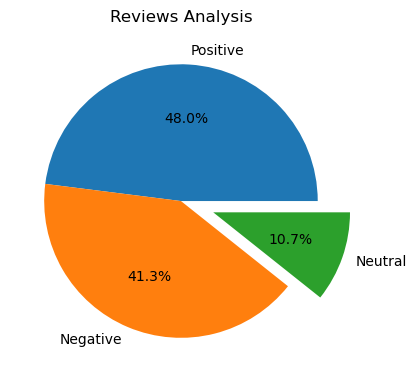

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

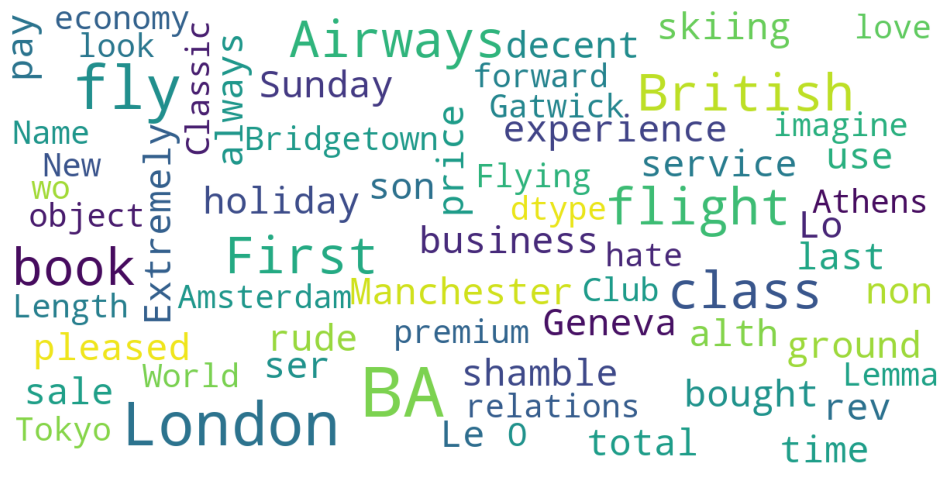

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

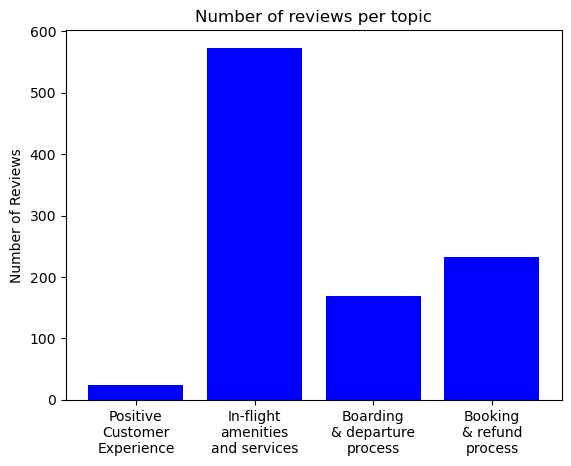

In [26]:
plt.bar(range(1,5,1),[25,573,169,233], color="blue")
plt.ylabel("Number of Reviews")
plt.title("Number of reviews per topic")
x_labels = (["Positive\nCustomer\nExperience", "In-flight\namenities\nand services",
            "Boarding\n& departure\nprocess","Booking\n& refund\nprocess"])
plt.xticks(range(1,5), x_labels)
# Show the graph
plt.show()